In [1]:
#Importing all the necessary libraries for machine learning
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier

In [2]:
#Importing csv file
nba_df = pd.read_csv('nba_rookie_data.csv')

## Tidying Dataset

In [3]:
#Checking if there are any null values in the dataset
print(nba_df.apply(lambda x: sum(x.isnull()), axis=0))

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64


In [4]:
#Dropping rows with null values
nba_df= nba_df.dropna()

In [5]:
#Checking again if null values are presentt in a dataset
print(nba_df.apply(lambda x: sum(x.isnull()), axis=0))

Name                   0
Games Played           0
Minutes Played         0
Points Per Game        0
Field Goals Made       0
Field Goal Attempts    0
Field Goal Percent     0
3 Point Made           0
3 Point Attempt        0
3 Point Percent        0
Free Throw Made        0
Free Throw Attempts    0
Free Throw Percent     0
Offensive Rebounds     0
Defensive Rebounds     0
Rebounds               0
Assists                0
Steals                 0
Blocks                 0
Turnovers              0
TARGET_5Yrs            0
dtype: int64


In [6]:
#Dropping duplicate values from the dataset
print('Size of a dataset before removing duplicates:', nba_df.shape)
nba_df.drop_duplicates(subset=None, inplace=True)
print('Size of a dataset after removing duplicates', nba_df.shape)

Size of a dataset before removing duplicates: (1329, 21)
Size of a dataset after removing duplicates (1318, 21)


In [7]:
print(nba_df.describe().transpose())

                      count       mean        std   min     25%    50%  \
Games Played         1318.0  60.402124  17.457767  11.0  47.000  63.00   
Minutes Played       1318.0  17.654249   8.340224   3.1  10.825  16.10   
Points Per Game      1318.0   6.821017   4.368868   0.7   3.700   5.60   
Field Goals Made     1318.0   2.635357   1.687763   0.3   1.400   2.10   
Field Goal Attempts  1318.0   5.900910   3.600133   0.8   3.300   4.80   
Field Goal Percent   1318.0  44.138998   6.116819  23.8  40.200  44.00   
3 Point Made         1318.0   0.249621   0.385397   0.0   0.000   0.10   
3 Point Attempt      1318.0   0.784598   1.065365   0.0   0.000   0.30   
3 Point Percent      1318.0  19.322989  16.045404   0.0   0.000  22.45   
Free Throw Made      1318.0   1.302731   0.989255   0.0   0.600   1.00   
Free Throw Attempts  1318.0   1.827162   1.325931   0.0   0.900   1.50   
Free Throw Percent   1318.0  70.412822  10.494442   0.0  64.800  71.30   
Offensive Rebounds   1318.0   1.008194

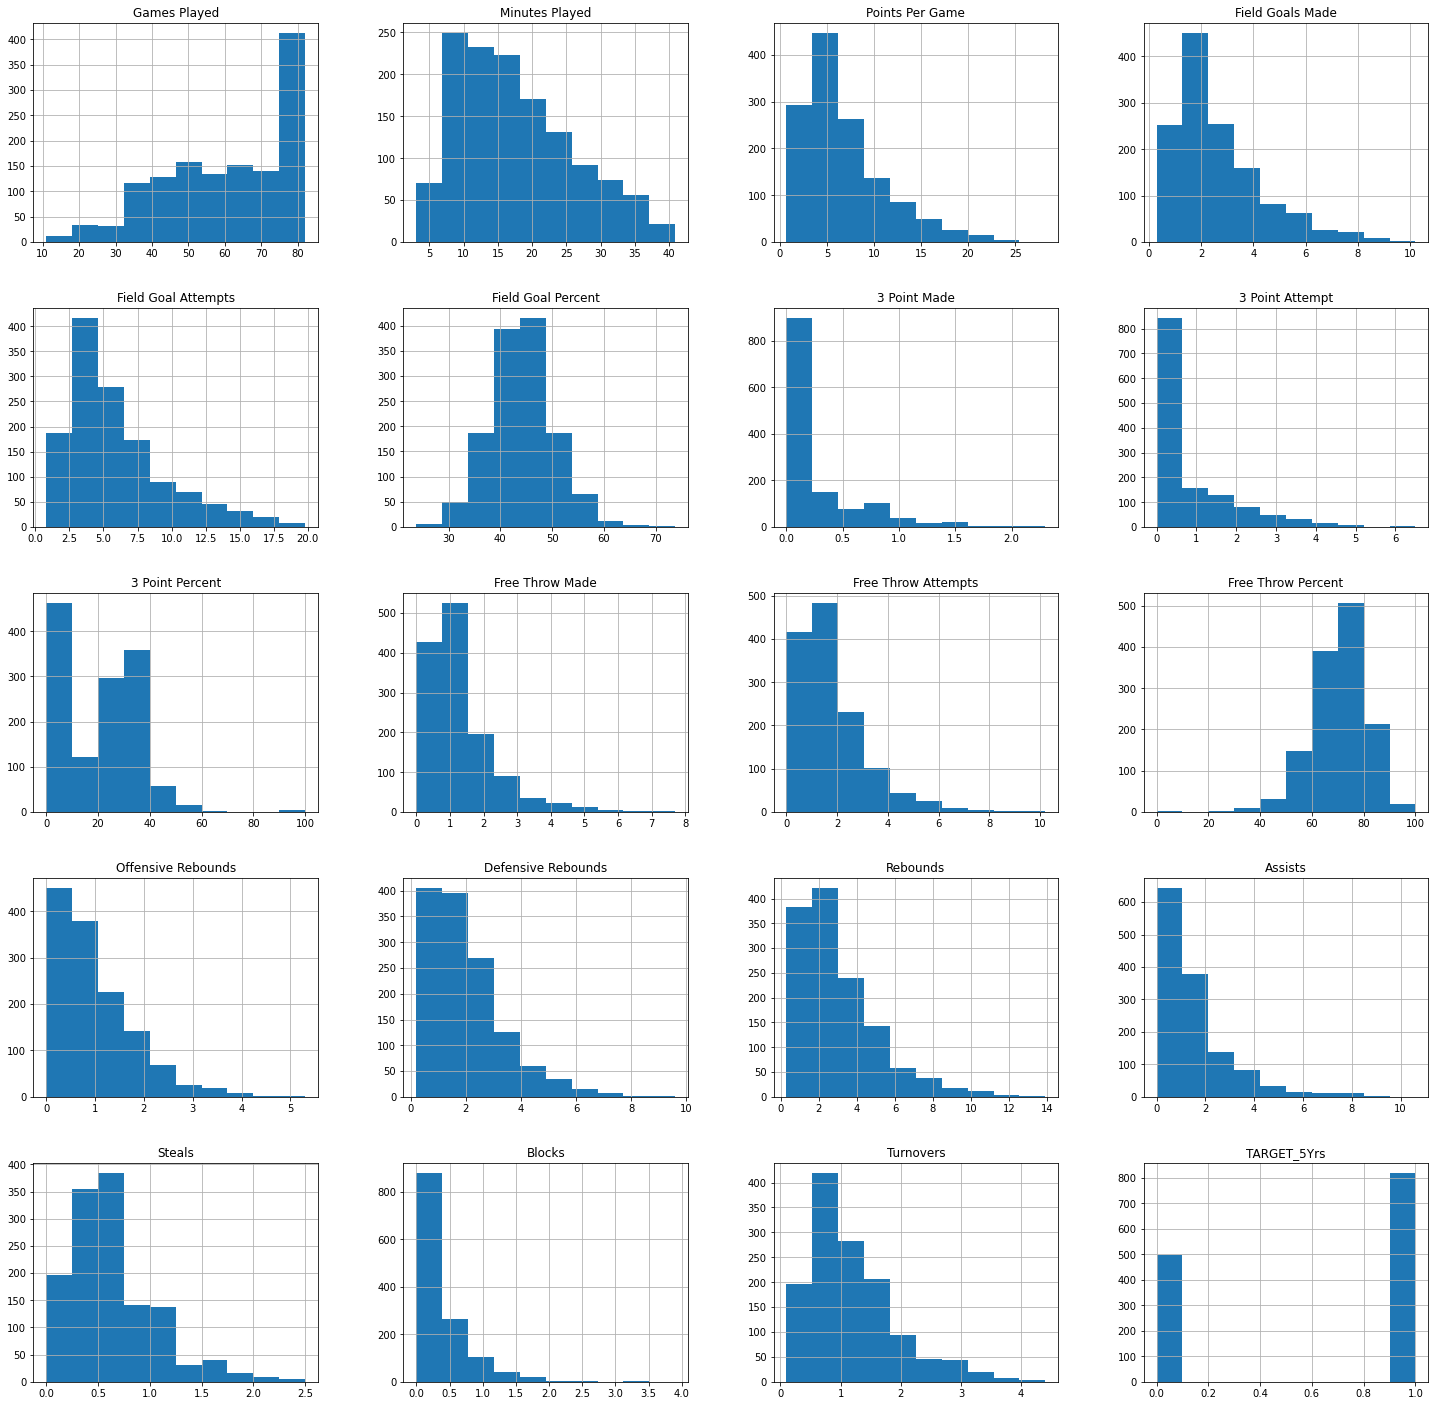

In [8]:
#Checking distribution of data using histogram
nba_df.hist(bins=10,figsize=(25,25))
plt.savefig('nba_hist.jpg', dpi=150, bbox_inches='tight')
plt.show()

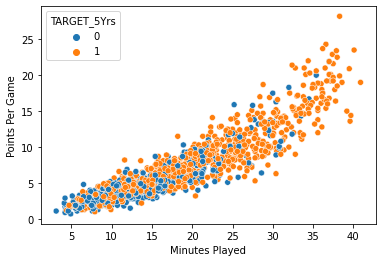

In [9]:
#Plotting scatter plot diagram to check the relationship between minutes played and points per game
sns.scatterplot(data=nba_df, x='Minutes Played', y='Points Per Game', hue='TARGET_5Yrs')
plt.savefig('pointspergm_minutepld.jpeg', dpi=150, bbox_inches='tight')
plt.show()

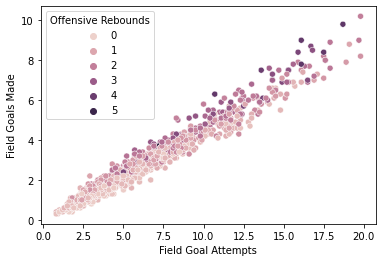

In [10]:
sns.scatterplot(data=nba_df, x='Field Goal Attempts', y='Field Goals Made', hue='Offensive Rebounds')
plt.savefig('fieldgl_vs_goalattmpt.jpeg', dpi=150, bbox_inches='tight')
plt.show()

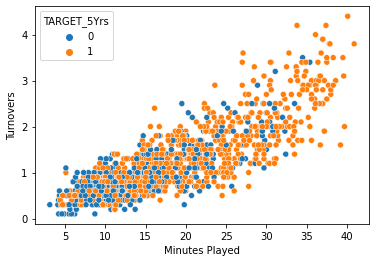

In [11]:
sns.scatterplot(data=nba_df, x='Minutes Played', y='Turnovers', hue='TARGET_5Yrs')
plt.savefig('Turnover_vs_minutespld.jpeg', dpi=150, bbox_inches='tight')
plt.show()

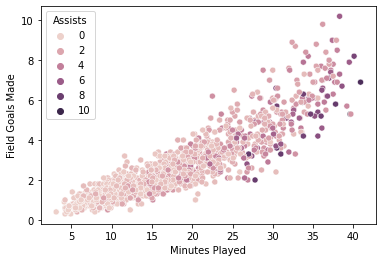

In [12]:
sns.scatterplot(data=nba_df, x='Minutes Played', y='Field Goals Made', hue='Assists')
plt.savefig('Goal_vs_assist.jpeg', dpi=150, bbox_inches='tight')
plt.show()

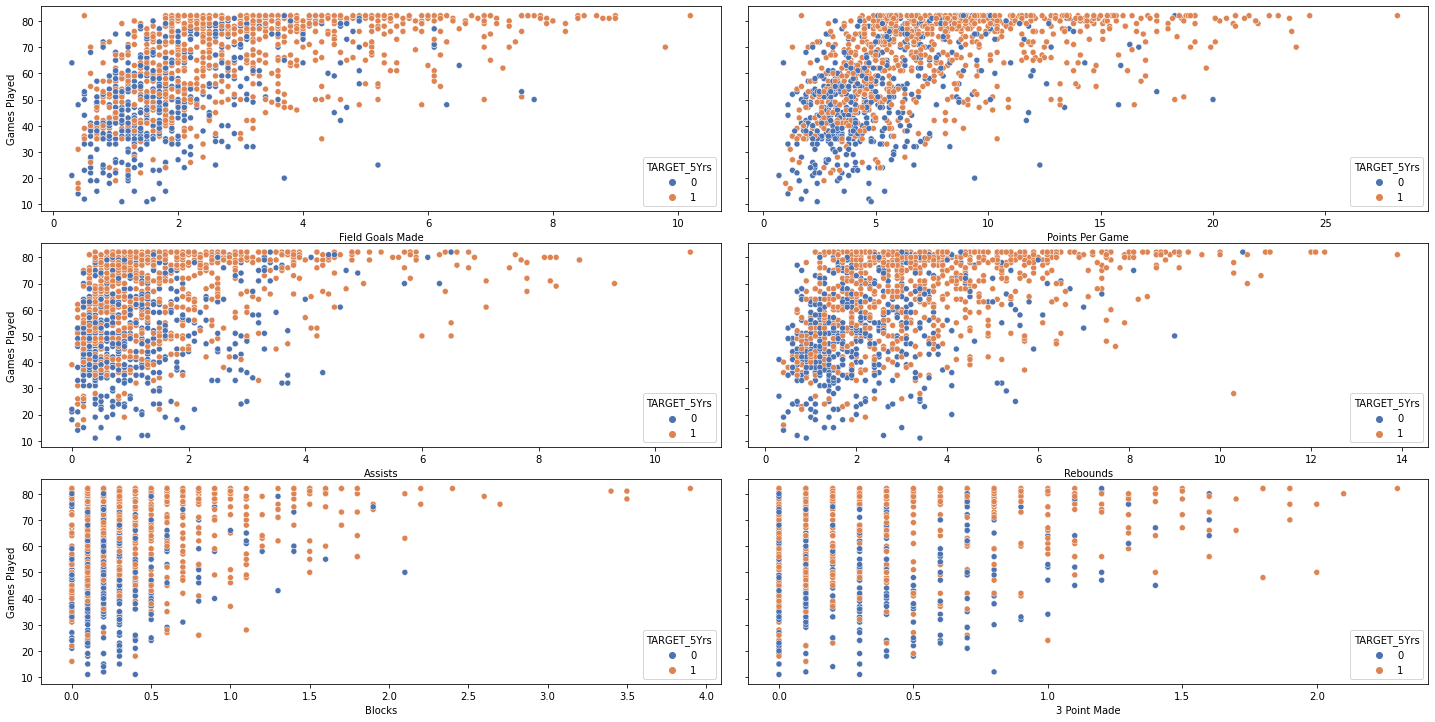

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharey= True, figsize=(20,10))
fig.tight_layout()

sns.scatterplot(data=nba_df, y='Games Played', x='Field Goals Made', hue='TARGET_5Yrs', palette='deep',ax=axes[0,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=nba_df, y='Games Played', x='Points Per Game',hue='TARGET_5Yrs',palette='deep', ax=axes[0,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=nba_df, y='Games Played', x='Assists', hue='TARGET_5Yrs', palette='deep', ax=axes[1,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=nba_df, y='Games Played', x='Rebounds', hue='TARGET_5Yrs', palette='deep', ax=axes[1,1])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=nba_df, y='Games Played', x='Blocks', hue='TARGET_5Yrs', palette='deep', ax=axes[2,0])
plt.ticklabel_format(style='plain')

sns.scatterplot(data=nba_df, y='Games Played', x='3 Point Made', hue='TARGET_5Yrs', palette='deep', ax=axes[2,1])
plt.ticklabel_format(style='plain')

plt.ticklabel_format(style='plain')
plt.savefig('Goal_assist_minutepld.jpeg', bbox_inches='tight')
plt.show()


<AxesSubplot:>

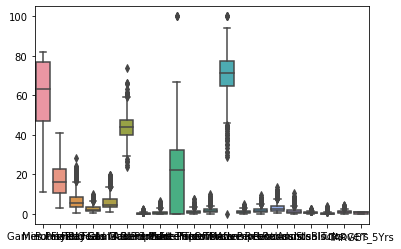

In [14]:
sns.boxplot(data=nba_df)

## Feature selection

In [15]:
nba_kmeans = KMeans(n_clusters=2, max_iter=150, random_state=6)
clustering_data =nba_df.drop(['Name'], axis=1)
nba_kmeans.fit(clustering_data)
nba_df['kmeans_score_nba'] = nba_kmeans.labels_

In [16]:
corr_matrix = nba_df.corr()
corr_matrix["TARGET_5Yrs"].sort_values(ascending=False)

TARGET_5Yrs            1.000000
Games Played           0.403781
Minutes Played         0.318435
Field Goals Made       0.317226
Points Per Game        0.315697
Rebounds               0.301905
Free Throw Attempts    0.298180
Free Throw Made        0.297329
Offensive Rebounds     0.295316
Field Goal Attempts    0.291205
Defensive Rebounds     0.287532
Turnovers              0.273680
Field Goal Percent     0.237833
Steals                 0.229533
Blocks                 0.212342
Assists                0.177313
Free Throw Percent     0.096356
3 Point Made           0.036384
3 Point Attempt        0.017500
3 Point Percent       -0.003065
kmeans_score_nba      -0.361385
Name: TARGET_5Yrs, dtype: float64

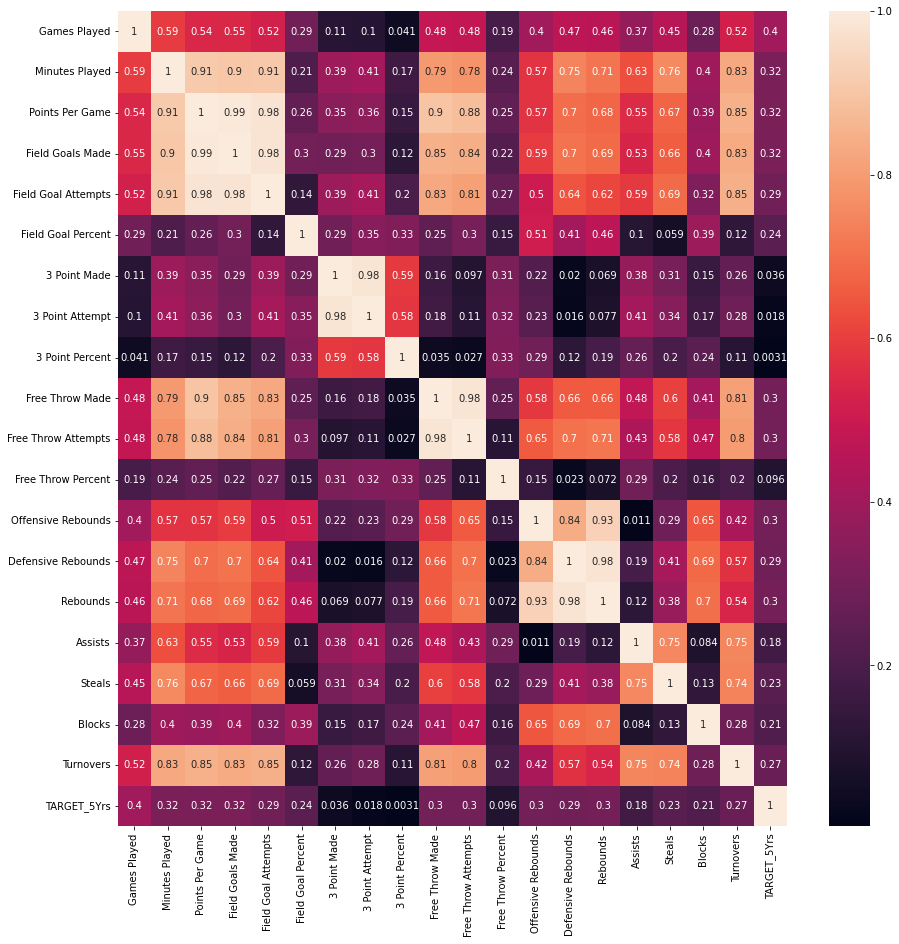

In [17]:
#Visualizing the feature's importance
nba_corr_data = nba_df.drop(['Name','kmeans_score_nba'], axis=1)
correlation_matrix = nba_corr_data.corr().abs()
plt.figure(figsize=(15,15))
sns.heatmap(data=correlation_matrix,annot=True)
plt.savefig('nba_correlation_heatmap.jpeg', dpi=100)

## Logistic Regression

**Creating model will all features**

In [18]:
# Creating input and output variables for logistic regression model
X_reg = nba_df.drop(['Name','TARGET_5Yrs'], axis=1)
y_reg= nba_df['TARGET_5Yrs']

In [19]:
#Normalizing the input data 
X_reg= StandardScaler().fit_transform(X_reg)

In [20]:
#Dividing the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.30, random_state=1)

In [21]:
logistic_model = LogisticRegression(random_state=1)

In [22]:
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [23]:
#Measuring model performance
y_predictions = logistic_model.predict(X_test)
r2 = r2_score(y_test, y_predictions)

print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('The r2 score of the model is: ', r2)
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != logistic_model.predict(X_test)).sum()))

Accuracy of the model is: 0.72
Precision Score of the model is: 0.77
The r2 score of the model is:  -0.18048780487804872
F1 score of the model is:  0.78
Recall score of the model is:  0.7926829268292683
Number of mislabeled points out of a total 396 points : 110


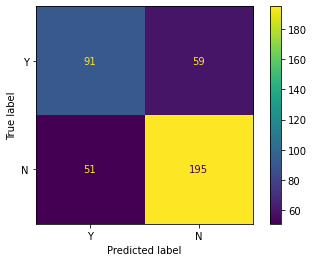

In [24]:
cm1 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm1, display_labels=labels).plot()

**Selecting features with high correlation value**

In [25]:
X_reg = nba_df.drop(['Name','TARGET_5Yrs', 'Turnovers', 'Turnovers','Steals', 'Assists', 'Free Throw Percent'], axis=1)
y_reg= nba_df['TARGET_5Yrs']

In [26]:
#Scaling input variables
X_reg= StandardScaler().fit_transform(X_reg)
#Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.30, random_state=1)
#creating and training the model
logistic_model1 = LogisticRegression(random_state=1)
logistic_model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [27]:
#Calculating model performance
y_predictions = logistic_model1.predict(X_test)
r2 = r2_score(y_test, y_predictions)

print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != logistic_model1.predict(X_test)).sum()))

Accuracy of the model is: 0.72
Precision Score of the model is: 0.76
F1 score of the model is:  0.7834645669291339
Recall score of the model is:  0.8089430894308943
Number of mislabeled points out of a total 396 points : 110


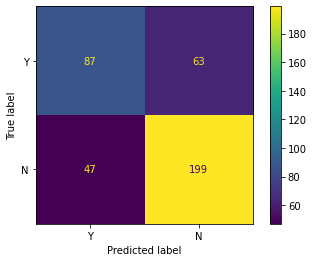

In [28]:
cm1 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm1, display_labels=labels).plot()

## Gaussian Naive Bayes

**Creating GNB model with all features**

In [29]:
# Creating input and output variables for logistic regression model
X_gnb = nba_df.drop(['Name','TARGET_5Yrs'], axis=1)
y_gnb= nba_df['TARGET_5Yrs']

In [30]:
#Scaling input variables
X_gnb= StandardScaler().fit_transform(X_gnb)
#Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_gnb, y_gnb, test_size=0.30, random_state=1)

In [31]:
gnb_model= GaussianNB()

In [32]:
gnb_model.fit(X_train,y_train)

GaussianNB()

In [33]:
#Evaluating model performance
y_predictions = gnb_model.predict(X_test)
r2 = r2_score(y_test, y_predictions)

print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != gnb_model.predict(X_test)).sum()))

Accuracy of the model is: 0.62
Precision Score of the model is: 0.82
F1 score of the model is:  0.6265664160401003
Recall score of the model is:  0.508130081300813
Number of mislabeled points out of a total 396 points : 149


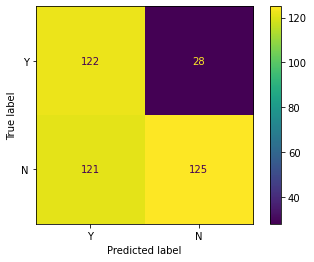

In [34]:
cm2 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm2, display_labels=labels).plot()

**Creating GNB model with few features**

In [35]:
#Creating input and output variables
X_gnb = nba_df.drop(['Name','TARGET_5Yrs', 'Turnovers', 'Turnovers','Steals', 'Assists', 'Free Throw Percent'], axis=1)
y_gnb= nba_df['TARGET_5Yrs']

In [36]:
#Scaling all input variables
X_gnb = StandardScaler().fit_transform(X_gnb)

In [37]:
#Splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_gnb, y_gnb, test_size=0.30, random_state=1)

In [38]:
gnb_model2= GaussianNB()

In [39]:
gnb_model2.fit(X_train, y_train)

GaussianNB()

In [40]:
y_predictions = gnb_model2.predict(X_test)
r2 = r2_score(y_test, y_predictions)

print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('The r2 score of the model is: ', r2)
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != gnb_model2.predict(X_test)).sum()))

Accuracy of the model is: 0.63
Precision Score of the model is: 0.82
The r2 score of the model is:  -0.5668292682926828
F1 score of the model is:  0.635
Recall score of the model is:  0.516260162601626
Number of mislabeled points out of a total 396 points : 146


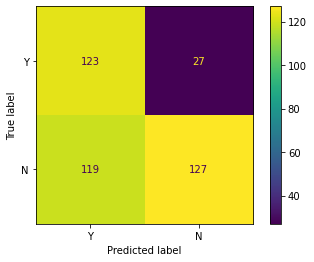

In [41]:
cm1 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm1, display_labels=labels).plot()

## Neural Networks

**Creating model with all features**

In [42]:
neural1 = MLPClassifier(hidden_layer_sizes=(25,20,5), activation='logistic', random_state=1, max_iter=1000)

In [43]:
# Creating input and output variables for neural network model
X_neural = nba_df.drop(['Name','TARGET_5Yrs'], axis=1)
y_neural= nba_df['TARGET_5Yrs']

In [44]:
#Standardizing features to get uniform data
X_neural = StandardScaler().fit_transform(X_neural)

In [45]:
#Dividing the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X_neural, y_neural, test_size=0.30, random_state=1)

In [46]:
neural1.fit(X_train, y_train)

C:\Users\subas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(25, 20, 5),
              max_iter=1000, random_state=1)

In [47]:
y_predictions = neural1.predict(X_test)

In [48]:
print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != neural1.predict(X_test)).sum()))

Accuracy of the model is: 0.68
Precision Score of the model is: 0.74
F1 score of the model is:  0.7444668008048289
Recall score of the model is:  0.7520325203252033
Number of mislabeled points out of a total 396 points : 127


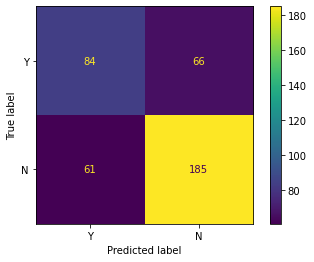

In [49]:
cm3 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm3, display_labels=labels).plot()

## Creating neural network model with few features

In [50]:
#Creating input and output variables
X_neural = nba_df.drop(['Name','TARGET_5Yrs', 'Turnovers', 'Turnovers','Steals', 'Assists', 'Free Throw Percent'], axis=1)
y_neural= nba_df['TARGET_5Yrs']

In [51]:
#Creating neural network
neural2 = MLPClassifier(hidden_layer_sizes=(25,20,5), activation='logistic', random_state=1, max_iter=1000)

In [52]:
#Scaling all features to get uniform scale
X_neural = StandardScaler().fit_transform(X_neural)

In [53]:
# Splitting data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X_neural, y_neural, test_size=0.30, random_state=1)

In [54]:
#Training the model
neural2.fit(X_test, y_test)

MLPClassifier(activation='logistic', hidden_layer_sizes=(25, 20, 5),
              max_iter=1000, random_state=1)

In [55]:
#Predicting using test data
y_predictions = neural2.predict(X_test)

In [56]:
print('Accuracy of the model is: %.2f'%accuracy_score(y_test, y_predictions))
print('Precision Score of the model is: %.2f'%precision_score(y_test, y_predictions))
print('F1 score of the model is: ', f1_score(y_test, y_predictions))
print('Recall score of the model is: ', recall_score(y_test, y_predictions))
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != neural2.predict(X_test)).sum()))

Accuracy of the model is: 0.74
Precision Score of the model is: 0.78
F1 score of the model is:  0.796812749003984
Recall score of the model is:  0.8130081300813008
Number of mislabeled points out of a total 396 points : 102


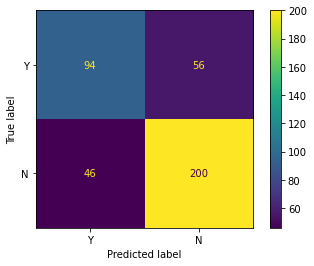

In [57]:
cm3 =confusion_matrix(y_test, y_predictions)
labels=['Y', 'N']
ConfusionMatrixDisplay(cm3, display_labels=labels).plot()
plt.savefig('Confusion-mat.jpg')